In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf

匹配滤波器

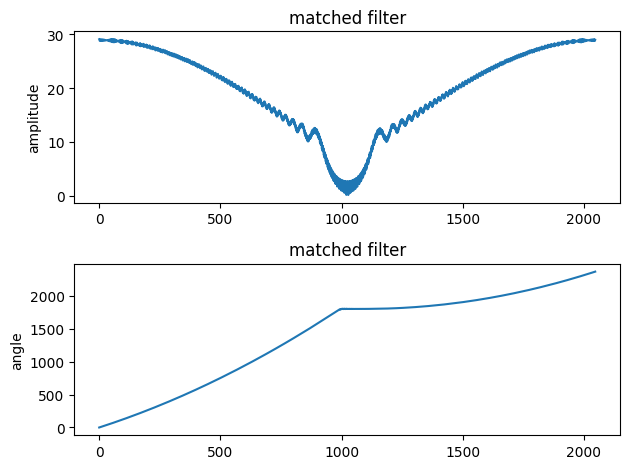

In [2]:
T = 42e-6
bandwidth = 17.2e+6
K = bandwidth/T
adc_sampling = 18.5e+6
N=777

t_l = np.linspace(-T/2,T/2,N)
kaiser_win = ss.get_window(window=('kaiser',2.5),Nx=N).astype(np.complex128)
s_t = kaiser_win*np.exp(1j*np.pi*K*t_l**2)

N_fft = 2048
f_l = np.linspace(-adc_sampling/2,adc_sampling/2-adc_sampling/N_fft,N_fft)
f_n = np.array(range(N_fft))
H2_f = np.conj(sf.fft(s_t,N_fft))
plt.figure()
plt.subplot(2,1,1)
plt.plot(f_n,np.abs(H2_f))
plt.ylabel('amplitude')
plt.title('matched filter')

plt.subplot(2,1,2)
plt.plot(f_n,np.unwrap(np.angle(H2_f)))
plt.ylabel('angle')
plt.title('matched filter')
plt.tight_layout()


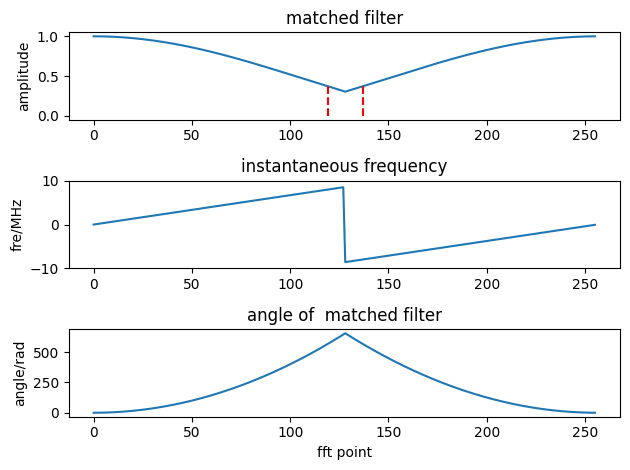

In [3]:
N_1_fft = 256
f_1_l = np.linspace(-adc_sampling/2,adc_sampling/2-adc_sampling/N_1_fft,N_1_fft)
f_n = np.array(range(N_1_fft))
N_ff = np.array([int(K*T/(adc_sampling/N_1_fft)/2),int(K*T/(adc_sampling/N_1_fft)/2),\
                 N_1_fft- int(K*T/(adc_sampling/N_1_fft)/2),N_1_fft- int(K*T/(adc_sampling/N_1_fft)/2)])
kaiser_fwin = ss.get_window(window=('kaiser',2.5),Nx=N_1_fft).astype(np.complex128)

H3_f = kaiser_fwin*np.exp(1j*np.pi*f_1_l**2/K)

plt.figure()
plt.subplot(3,1,1)
plt.plot(f_n,np.fft.fftshift(np.abs(H3_f)))
plt.plot(N_ff[0:2],np.array([0,np.fft.fftshift(np.abs(H3_f))[N_ff[0]]]),'--',color = 'red')
plt.plot(N_ff[2:4],np.array([0,np.fft.fftshift(np.abs(H3_f))[N_ff[2]]]),'--',color = 'red')

plt.ylabel('amplitude')
plt.title('matched filter')

plt.subplot(3,1,2)
K_l = np.linspace(-bandwidth/2,bandwidth/2-adc_sampling/N_1_fft,N_1_fft)
plt.plot(f_n,np.fft.fftshift(K_l)*1e-6)
plt.ylabel('fre/MHz')
plt.ylim(-10,10)
plt.title('instantaneous frequency')

plt.subplot(3,1,3)

angle = np.pi*f_1_l**2/K
plt.plot(f_n,np.unwrap(np.fft.fftshift((np.angle(H3_f)-angle)))+np.fft.fftshift(angle))
plt.xlabel('fft point')
plt.ylabel('angle/rad')
plt.title('angle of  matched filter')
plt.tight_layout()


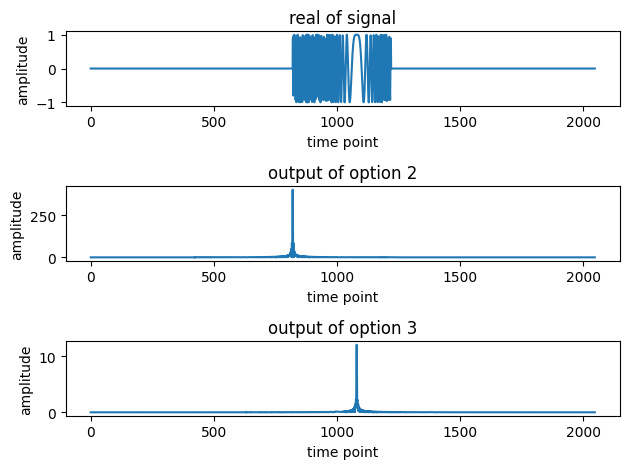

In [ ]:
TBP = 200
bandwidth = 2e+6
T = TBP/bandwidth
K = bandwidth/T
N=401
t_l = np.linspace(-T/2,T/2,N)
adc_sampling = 1/(t_l[1]-t_l[0])

N_ZD = 60
N_fft = 2048
t_n = np.array(range(N_fft))
x_chirp = np.exp(1j*np.pi*K*(t_l-N_ZD/adc_sampling)**2)
x_time = np.zeros(N_fft,dtype=np.complex128)
x_time[20:20+N] = x_chirp
x_time[820:820+N] = x_chirp
x_time[1620:1620+N] = x_chirp
x_time_fft = sf.fft(x_time,N_fft)


plt.figure()
plt.subplot(3,1,1)
plt.plot(t_n,np.real(x_time))
plt.xlabel('time point')
plt.ylabel('amplitude')
plt.title('real of signal')

plt.subplot(3,1,2)
h_2 = x_chirp
h_2_fft = np.conjugate(sf.fft(h_2,N_fft))
x_2_mf = sf.ifft(x_time_fft*h_2_fft)
# x_2_mf = np.roll(x_2_mf,20)
# x_mf_time[20:20+N] += x_2_mf
# x_mf_time[820:820+N] += x_2_mf
# x_mf_time[1620:1620+N] += x_2_mf
plt.plot(t_n,np.abs(x_2_mf))
plt.xlabel('time point')
plt.ylabel('amplitude')
plt.title('output of option 2')

plt.subplot(3,1,3)
f_l = np.linspace(-adc_sampling/2,adc_sampling/2-adc_sampling/N_fft,N_fft)
h_3_fft = np.exp(1j*np.pi*((f_l)**2)/K)*np.exp(1j*np.pi/4)
width = int(np.abs(bandwidth)/(adc_sampling/N_fft)/2)
h_3_fft[0:int(N_fft/2)-width] = 0
h_3_fft[int(N_fft/2)+width:N_fft] = 0
x_3_mf = sf.ifft(x_time_fft*np.fft.fftshift(h_3_fft))
plt.plot(t_n,np.abs(x_3_mf))
plt.xlabel('time point')
plt.ylabel('amplitude')
plt.title('output of option 3')
plt.tight_layout()

N: 8400
N_fft: 65536


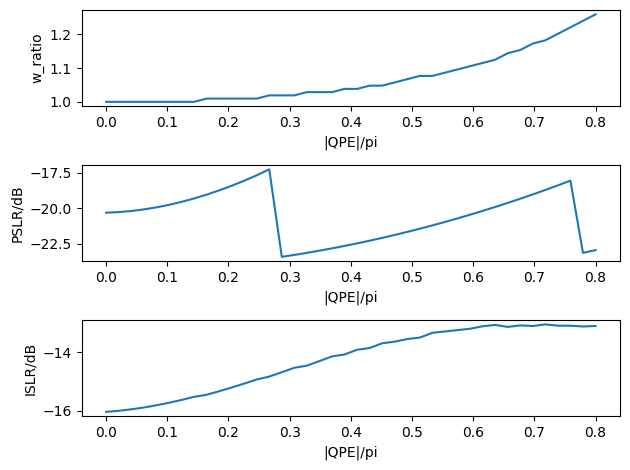

In [5]:
TBP = 42
T = 7.2e-6
bandwidth = TBP/T
K = bandwidth/T
adc_sampling = 200*bandwidth
N = int(adc_sampling*T/2)*2
interval = 1/adc_sampling
QPE = np.linspace(0,0.8*np.pi,40); 
delta_K = QPE/(np.pi*(T/2)**2)

N_fft = int(4*2**(np.ceil(np.log2(N))))
print('N:',N)
print('N_fft:',N_fft)

t_l = np.linspace(-T/2,T/2-interval,N)
x_chirp = np.exp(1j*np.pi*K*(t_l)**2)
kaiser_win = ss.get_window(window=('kaiser',2.5),Nx= N)
kaiser_fft = np.fft.fftshift(ss.get_window(window=('kaiser',2.5),Nx= N_fft))
x_fft = sf.fft(x_chirp,N_fft)
w_ratio = np.zeros_like(delta_K)
PSLR = np.zeros_like(delta_K)
ISLR = np.zeros_like(delta_K)
for i in range(len(delta_K)):
    h_t = np.exp(1j*np.pi*(K+delta_K[i])*(t_l)**2)*kaiser_win
    H_fft = np.conjugate(sf.fft(h_t,N_fft))
    x_mf = np.roll(sf.ifft(x_fft*H_fft),int(N_fft/2)) 
    x_mf /= np.max(np.abs(x_mf))

    x_idx_max = np.argmax(np.abs(x_mf))
    x_idx_min_1 = np.argmin(np.abs(np.abs(x_mf[0:x_idx_max])**2-0.5))
    x_idx_min_2 = np.argmin(np.abs(np.abs(x_mf[x_idx_max:N_fft])**2-0.5))+x_idx_max

    x_elex_index = ss.argrelextrema(np.abs(x_mf),np.greater)
    x_elex=np.sort(np.abs(x_mf)[x_elex_index])

    x_islr_idx = int(2.8*(x_idx_min_2 - x_idx_min_1))
    ISLR[i] = 10*np.log10(np.sum(np.abs(x_mf)**2)/np.sum(np.abs(x_mf[x_idx_max-int(x_islr_idx/2):\
                                                                x_idx_max+int(x_islr_idx/2)])**2)-1)

    PSLR[i] = (x_elex[-2]/x_elex[-1])**2
    w_ratio[i] = np.abs(x_idx_min_2-x_idx_min_1)

w_ratio /= w_ratio[0]
plt.figure()
plt.subplot(3,1,1)
plt.plot(delta_K*(T/2)**2,w_ratio)
plt.xlabel('|QPE|/pi')
plt.ylabel('w_ratio')

plt.subplot(3,1,2)
plt.plot(delta_K*(T/2)**2,10*np.log10(PSLR))
plt.xlabel('|QPE|/pi')
plt.ylabel('PSLR/dB')

plt.subplot(3,1,3)
plt.plot(delta_K*(T/2)**2,(ISLR))
plt.xlabel('|QPE|/pi')
plt.ylabel('ISLR/dB')

plt.tight_layout()

0.26666666666666666


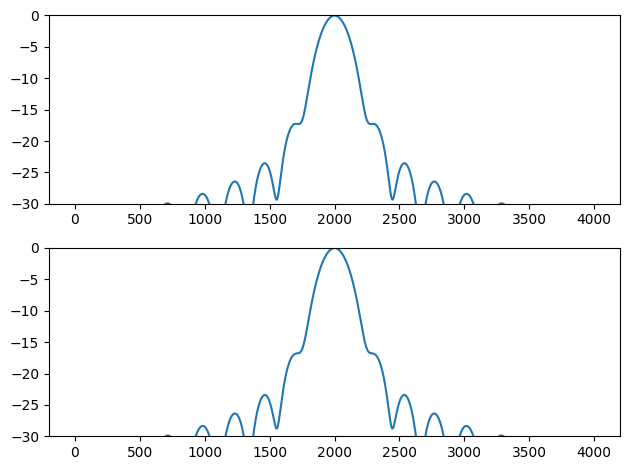

In [6]:

change_point = ss.argrelextrema(np.abs(PSLR[0:int(len(PSLR)/2)]),np.greater)
change_point = (np.array(change_point).flatten())[0]
plt.figure()
plt.subplot(2,1,1)
kk = change_point
h_t = np.exp(1j*np.pi*(K+delta_K[kk])*(t_l)**2)*kaiser_win
H_fft = np.conjugate(sf.fft(h_t,N_fft))
x_mf = np.roll(sf.ifft(x_fft*H_fft),int(N_fft/2))
x_mf /= np.max(np.abs(x_mf))
x_idx_max = np.argmax(np.abs(x_mf))
x_elex_index = ss.argrelextrema(np.abs(x_mf),np.greater)
x_elex=np.sort(np.abs(x_mf)[x_elex_index])

plt.plot(range(4000),20*np.log10(np.abs(x_mf[x_idx_max-2000:x_idx_max+2000])))
plt.ylim(-30,0)

plt.subplot(2,1,2)
kk = change_point + 1
h_t = np.exp(1j*np.pi*(K+delta_K[kk])*(t_l)**2)*kaiser_win
H_fft = np.conjugate(sf.fft(h_t,N_fft))
x_mf = np.roll(sf.ifft(x_fft*H_fft),int(N_fft/2))
x_mf /= np.max(np.abs(x_mf))
x_idx_max = np.argmax(np.abs(x_mf))
x_elex_index = ss.argrelextrema(np.abs(x_mf),np.greater)
x_elex=np.sort(np.abs(x_mf)[x_elex_index])

plt.plot(range(4000),20*np.log10(np.abs(x_mf[x_idx_max-2000:x_idx_max+2000])))
plt.ylim(-30,0)
plt.tight_layout()

print(QPE[change_point]/np.pi)